In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [3]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Pivot Tables by Hand

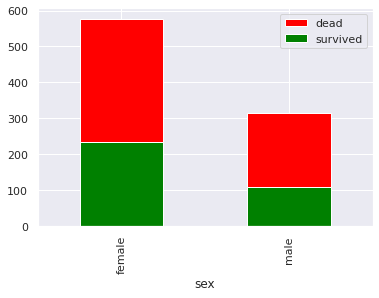

In [4]:
titanic["sex"].value_counts().plot(kind="bar", color="red", label="dead")
titanic.groupby(["sex"])["survived"].sum().plot(kind="bar", color="green", label="survived")
plt.legend()

In [5]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex
and, say, class. Using the vocabulary of GroupBy , we might proceed using something
like this: we group by class and gender, select survival, apply a mean aggregate, com‐
bine the resulting groups, and then unstack the hierarchical index to reveal the hidden
multidimensionality. In code:

In [6]:
titanic_sex_class_survived = titanic.groupby(["sex","class"])["survived"].mean().unstack()
titanic_sex_class_survived

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Text(0.5, 1.0, 'The survived ratio of people in the titanic ship by sex and class type')

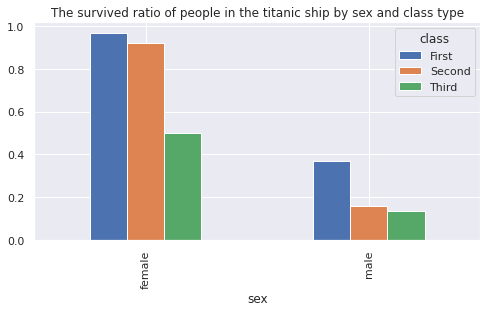

In [7]:
titanic_sex_class_survived.plot(kind="bar", figsize=(8,4))
plt.title("The survived ratio of people in the titanic ship by sex and class type")


# Pivot Table Syntax

In [8]:
titanic.pivot_table("survived",index="sex",columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Multilevel pivot tables

Just as in the GroupBy , the grouping in pivot tables can be specified with multiple lev‐
els, and via a number of options. For example, we might be interested in looking at
age as a third dimension. We’ll bin the age using the pd.cut function:

In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
age = pd.cut(titanic["age"],[0,18,80])
titanic.pivot_table("survived",index=["sex",age],columns="class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [11]:
fare = pd.qcut(titanic["fare"],2)
titanic.pivot_table("survived", index=["sex",age],columns=[fare,"class"])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## Additional pivot table options

The full call signature of the pivot_table method of DataFrame s is as follows:

`DataFrame.pivot_table(data, values=None, index=None, columns=None,
                        aggfunc='mean', fill_value=None, margins=False,
                           dropna=True, margins_name='All')`

We’ve already seen examples of the first three arguments; here we’ll take a quick look
at the remaining ones. Two of the options, fill_value and dropna , have to do with
missing data and are fairly straightforward; we will not show examples of them here.

The aggfunc keyword controls what type of aggregation is applied, which is a mean
by default. As in the GroupBy , the aggregation specification can be a string represent‐
ing one of several common choices ( 'sum' , 'mean' , 'count' , 'min' , 'max' , etc.) or a
function that implements an aggregation ( np.sum() , min() , sum() , etc.). Additionally,
it can be specified as a dictionary mapping a column to any of the above desired
options:

In [12]:
titanic.pivot_table( index="sex", columns="class", aggfunc={"survived":np.sum, "fare" :np.mean})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

**Notice** also here that we’ve omitted the values keyword; when you’re specifying a
mapping for aggfunc , this is determined automatically.

# Example: Birthrate Data

In [13]:
births = pd.read_csv("../../data/births.csv")

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [14]:
births.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [15]:
births["day"].fillna(1)

0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
15542    1.0
15543    1.0
15544    1.0
15545    1.0
15546    1.0
Name: day, Length: 15547, dtype: float64

We can start to understand this data a bit more by using a pivot table. Let’s add a decade column, and take a look at male and female births as a function of decade:

### Analysing total of the births by decade

In [16]:
decade= 10* (births["year"] // 10)
decade = decade.astype(str) + "s"
births_by_decade_and_gender = births.pivot_table(values="births", index=decade, columns="gender" )
births_by_decade_and_gender

gender,F,M
year,,
1960s,4566.755208,4808.781250
1970s,4267.403569,4497.386393
1980s,5460.886072,5740.886635
1990s,162328.783333,170171.275000
2000s,168789.898148,176911.370370


<AxesSubplot:ylabel='year'>

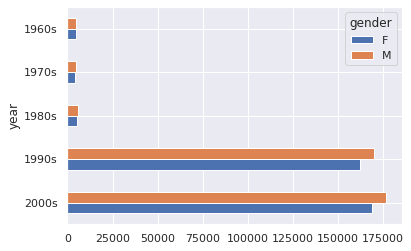

In [17]:
births_by_decade_and_gender.sort_index(ascending=False).plot(kind="barh")

### Analysing total of the births by every single year

In [18]:
births_by_year_and_gender = births.pivot_table("births",index="year", columns="gender", aggfunc=np.sum)
births_by_year_and_gender.head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


Text(0, 0.5, 'total birth per year')

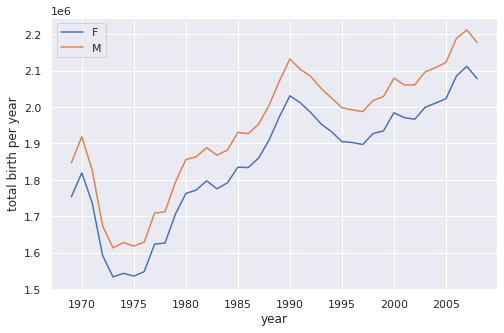

In [19]:
births_by_year_and_gender.plot(figsize=(8,5))
plt.legend()
plt.xlabel("year")
plt.ylabel("total birth per year")

With a simple pivot table and plot() method, we can immediately see the annual
trend in births by gender. By eye, it appears that over the past 50 years male births
have outnumbered female births by around 5%.

Though this doesn’t necessarily relate to the pivot table, there are a few more interest‐
ing features we can pull out of this dataset using the Pandas tools covered up to this
point. We must start by cleaning the data a bit, removing outliers caused by mistyped
dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove
these all at once is to cut outliers; we’ll do this via a robust sigma-clipping operation: 1

In [20]:
quartiles = np.percentile(births["births"],[25,50,75])
mu = quartiles[1]
sigma = 0.75*(quartiles[2] - quartiles[0])
births = births.query("(births > @mu - 5*@sigma) & (births < @mu + 5*@sigma)")

births["day"] = births["day"].astype(int)
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15062,1988,12,29,M,5944
15063,1988,12,30,F,5742
15064,1988,12,30,M,6095
15065,1988,12,31,F,4435


Finally, we can combine the day, month, and year to create a Date index (see “Work‐
ing with Time Series” on page 188). This allows us to quickly compute the weekday
corresponding to each row:

In [21]:
births.index = pd.to_datetime(births.year*10000+births.month*100+births.day, format="%Y%m%d")
births["dayofweek"] = births.index.dayofweek
births

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4
...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,3
1988-12-30,1988,12,30,F,5742,4
1988-12-30,1988,12,30,M,6095,4
1988-12-31,1988,12,31,F,4435,5


<ipython-input-22-9fc044d7c965>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


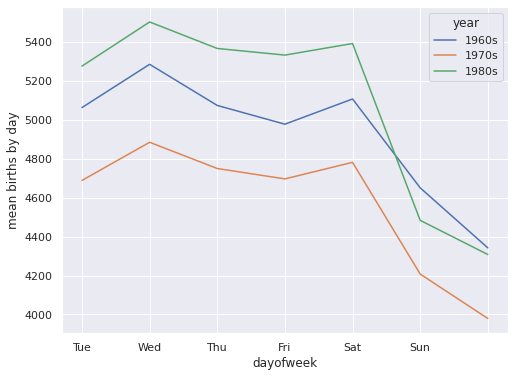

In [22]:
import matplotlib as mpl
decade = 10* (births["year"] // 10)
decade = decade.astype(str) + "s"
births.pivot_table("births", index="dayofweek", columns=decade, aggfunc=np.mean).plot(figsize=(8,6))
plt.gca().set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.ylabel('mean births by day');


<AxesSubplot:xlabel='month'>

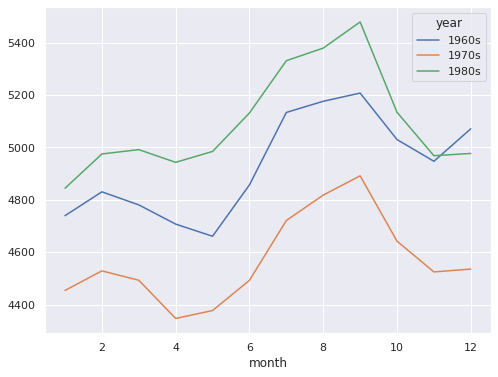

In [23]:
births.pivot_table("births", index="month", columns=decade, aggfunc=np.mean).plot(figsize=(8,6))

The result is a multi-index over months and days. To make this easily plottable, let’s
turn these months and days into a date by associating them with a dummy year vari‐
able (making sure to choose a leap year so February 29th is correctly handled!)

<AxesSubplot:>

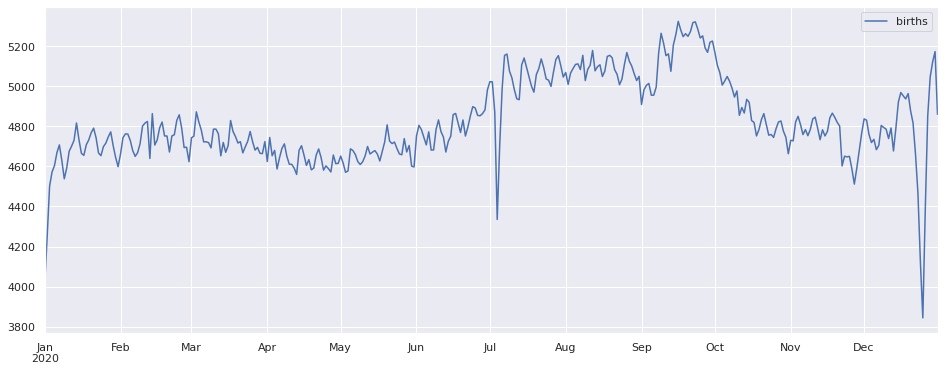

In [24]:
import datetime
births_by_date = births.pivot_table("births", index=[births["month"], births["day"]])

births_by_date.index = [datetime.datetime(2020,month,day) for (month, day) in births_by_date.index]


births_by_date.plot(figsize=(16,6))